# DSI Capstone Project: Cake Pricing Tool using Image Recognition
## Stage 1: Image Preparation for Modeling

#### Problem Statement: 
Over the past decade, there has been an explosion of interest and media attention on cake decorating. TV shows such as Great British Baking Show, Cake Boss, Ace of Cakes and Cake Wars have introduced us to cake designs, techniques and a level of artistry well beyond the homemade creations that graced most of our birthday parties as children. 

As media attention grew, so did the number of bakers wanting to take their cakes to the next level. In addition to professional bakeries, there was a proliferation of home bakers who began their own cake business as well. 

As more and more home bakers entered the market, the question of how to fairly price their creations quickly became an issue for many. At the top of the market were professional bakeries who could charge top dollar for their creations and turn out dozens of cakes per week. On the low end of the price spectrum were grocery store creations and Costco cakes. Home bakers needed to find a happy medium between these two extremes, and ensure they were getting a fair price for the labor, ingredients and materials that went into each cake.  

This project aims to create an image recognition model that will aid home bakers in setting a fair market price for their cakes. A baker will be able to take a picture of a cake, and be given a price range for a cake of that size and sophistication, to aid them in charging a fair rate. 

#### Data:
My first task was the collect and categorize a large number of cakes. As a home baker, I had images of my own cakes, but I needed a lot more in order to train my model. I reaching out to fellow home bakers and they provided me with hundreds of their own cakes as well. 

Although my goal is to predict a price, which seems like a regression problem, I quickly discovered two things: 1) labeling every cake individually with a price tag would be a huge task, and 2) this would create way too many "classes" for the model to predict. Therefore, I decided to first classify cakes into some visual buckets, then assign price ranges based on those classifications.

The classification categories I chose are:
1. One-tier with simple decorations
2. One-tier with complex decorations
3. Two-tiers with simple decorations
4. Two-tiers with complex decorations
5. Three or more tiers with simple decorations
6. Three of more tiers with complex decorations
7. Sculpted cake with simple design
8. Sculpted cake with complex design

#### Image EDA
In order to train a CNN model, all images must be the same size, so I need to understand the aspect ratios of my original images in order to decide how to resize them. I will get stats for all images and write them to a dataframe for analysis.

In [35]:
# Imports:
import pandas as pd
import numpy as np
from glob import glob
import os
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [414]:
pwd

'/Users/heatherjohansen/Desktop/dsi/Projects/project_6'

In [422]:
# Create paths to my annotated image folders:
source_dir_1t_s = 'images/03_flipped_images/1_Tier_Simple'
source_dir_1t_c = 'images/03_flipped_images/1_Tier_Complex'
source_dir_2t_s = 'images/03_flipped_images/2_Tier_Simple'
source_dir_2t_c = 'images/03_flipped_images/2_Tier_Complex'
source_dir_3t_s = 'images/03_flipped_images/3+_Tier_Simple'
source_dir_3t_c = 'images/03_flipped_images/3+_Tier_Complex'
source_dir_sc_s = 'images/03_flipped_images/Sculpted_Simple'
source_dir_sc_c = 'images/03_flipped_images/Sculpted_Complex'


In [423]:
# Create file paths to iterate through below:
source_dir = source_dir_3t_c
filenames = glob('{}/*'.format(source_dir))
filenames

['images/03_flipped_images/3+_Tier_Complex/IMG_4534.jpeg',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4559.jpeg',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4701.JPG',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4611.jpeg',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4539.jpeg',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4775.jpeg',
 'images/03_flipped_images/3+_Tier_Complex/farm.jpg',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4699.JPG',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4706.JPG',
 'images/03_flipped_images/3+_Tier_Complex/australia.jpg',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4695.jpeg',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4436.jpeg',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4677.jpeg',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4378.jpeg',
 'images/03_flipped_images/3+_Tier_Complex/IMG_4544.jpeg',
 'images/03_flipped_images/3+_Tier_Complex/hazel_princess.JPG',
 'images/03_flipped_images/3+_Tier_Complex/baby_shower_shee

In [27]:
# Create list once, then comment out for consecutive runs of for loop at add images from each folder to list:
# image_stats = []

In [28]:
# Create list of image details for EDA:
for filename in filenames:
    with Image.open(filename) as image:
        width, height = image.size
        filesize = os.path.getsize(filename)
        image_stats.append([source_dir, filename, height, width, filesize])

In [29]:
# Create dataframe of image stats to understand dimensions and image sizes:
image_stats_df = pd.DataFrame(image_stats, columns = ['Category', 'Filepath', 'Height', 'Width', 'Filesize'])

In [395]:
# Removing 'images/' in order to clean up the columns a bit:
image_stats_df = image_stats_df.replace({'images/': ''}, regex=True)
image_stats_df

,Category,Filepath,Height,Width,Filesize
0,1_Tier_Simple,1_Tier_Simple/IMG_4471.jpeg,975,828,143428
1,1_Tier_Simple,1_Tier_Simple/IMG_4488.jpeg,809,828,150281
2,1_Tier_Simple,1_Tier_Simple/IMG_4365.jpeg,712,828,294897
3,1_Tier_Simple,1_Tier_Simple/IMG_4580.jpeg,1024,642,77168
4,1_Tier_Simple,1_Tier_Simple/IMG_4646.jpeg,892,827,87151
...,...,...,...,...,...
394,Sculpted_Complex,Sculpted_Complex/IMG_4583.jpeg,784,828,108934
395,Sculpted_Complex,Sculpted_Complex/champagne.JPG,2448,3264,1321184
396,Sculpted_Complex,Sculpted_Complex/deepta_foot.jpg,540,720,54492
397,Sculpted_Complex,Sculpted_Complex/IMG_4560.jpeg,971,828,280532


In [286]:
# Overall image stats:
image_stats_df.describe().loc[['count','mean', 'max', 'min']].T

,count,mean,max,min
Height,399.0,991.994987,3626.0,211.0
Width,399.0,894.982456,4032.0,235.0
Filesize,399.0,319915.879699,3660217.0,23168.0


In [297]:
# Image stats by category to see if a certain category has significantly different dimensions or sizes from others
# Average aspect ratio is 1.1, with 3+ Tier Simple cakes having the highest ratio at 1.34 and Sculpted Simple cakes the lowest at .96
image_stats_df.groupby('Category').describe().T.loc[['Height', 'Width']]

Category      1_Tier_Complex  1_Tier_Simple  2_Tier_Complex  2_Tier_Simple  \
Height count       79.000000      67.000000       54.000000      39.000000   
       mean       916.367089     782.029851     1321.370370    1159.410256   
       std        462.787712     320.715628      825.632160     622.974559   
       min        211.000000     425.000000      453.000000     453.000000   
       25%        771.500000     632.000000      840.000000     834.000000   
       50%        859.000000     768.000000      976.000000    1006.000000   
       75%        933.500000     880.000000     1360.000000    1243.000000   
       max       3264.000000    3024.000000     3264.000000    3626.000000   
Width  count       79.000000      67.000000       54.000000      39.000000   
       mean       810.202532     794.432836     1149.370370     946.435897   
       std        543.854062     425.917271     1003.897429     733.382639   
       min        284.000000     418.000000      329.000000     297.000000   
       25%        597.000000     645.000000      563.250000     612.500000   
       50%        804.000000     792.000000      720.000000     737.000000   
       75%        828.000000     828.000000     1004.250000     970.500000   
       max       4032.000000    4032.000000     4032.000000    4032.000000   

Category      3+_Tier_Complex  3+_Tier_Simple  Sculpted_Complex  \
Height count        33.000000       36.000000         49.000000   
       mean        940.030303     1014.138889       1052.959184   
       std         346.770501      389.332260        738.523103   
       min         535.000000      357.000000        270.000000   
       25%         793.000000      836.250000        622.000000   
       50%         937.000000      959.500000        842.000000   
       75%         997.000000     1032.500000       1024.000000   
       max        2448.000000     2448.000000       3512.000000   
Width  count        33.000000       36.000000         49.000000   
       mean        733.515152      755.527778       1077.755102   
       std         478.547419      484.186297        876.419005   
       min         357.000000      235.000000        235.000000   
       25%         540.000000      560.000000        666.000000   
       50%         676.000000      656.000000        828.000000   
       75%         796.000000      816.250000        960.000000   
       max        3264.000000     3264.000000       4032.000000   

Category      Sculpted_Simple  
Height count        42.000000  
       mean        840.976190  
       std         427.783595  
       min         360.000000  
       25%         628.750000  
       50%         765.500000  
       75%         960.000000  
       max        3024.000000  
Width  count        42.000000  
       mean        873.166667  
       std         531.619794  
       min         270.000000  
       25%         694.500000  
       50%         807.000000  
       75%         880.750000  
       max        4032.000000

#### Image Resizing
From the EDA above, most categories of images have roughly square shapes, with a ratio of 1.1 high to 1 wide. Simple 3+ Tier cakes have the highest ratio at 1.34, and Simple Sculpted Cakes have the lowest at .96. In order to get all cakes to be the same aspect ratio, I will resize them to 443H x 400W. 

In [99]:
# Thank you to TheWayWeWere and this StackOverflow answer for the formula below: 

def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image - setting ratio at 1.1 per mean ratios of my images:
    resized = cv2.resize(image, (400,443), interpolation = inter)

    # return the resized image
    return resized

In [415]:
# Setting filenames for each folder of my categorized training data. 
# Process: Rerun for each source_dir, then run for loop to create resized images using function above
source_dir = source_dir_1t_c
filenames = glob('{}/*'.format(source_dir))

In [313]:
# Create resized images and save to new folders:
for filename in filenames:
    img = cv2.imread(filename, -1)
    img_new = image_resize(img, width=400, height=443, inter= cv2.INTER_AREA)
    new_filepath = 'images/resized_images/' + filename
    cv2.imwrite(new_filepath, img_new)

#### Image Augmentation
Because I have 8 categories and only 400 total images, my model may have a hard time finding the patterns to differentiate between my classes. In addition, I have unbalanced classes, with more 1-tier cakes and fewer of the other categories. 

I am going to create mirrored copies of all cakes in order to augment my dataset. 

In [317]:
def image_flip(image):
    flipped = cv2.flip(image, 1)
    return flipped

In [319]:
img_flip = image_flip(img)

In [398]:
cv2.imshow('img_flip' , img_flip)
k = cv2.waitKey(10)

In [399]:
cv2.imshow('img', img)
k = cv2.waitKey(10)

In [360]:
# Create flipped images of all resized images and save to new folder:
for filename in filenames:
    img = cv2.imread(filename, -1)
    img_flip = image_flip(img)
    new_filepath = 'images/resized_images/images/flipped_images/' + filename
    cv2.imwrite(new_filepath, img_flip)

In [480]:
# Create paths to my annotated image folders:
# source_dir = 'images/03_flipped_images/1_Tier_Simple' # Done
# source_dir = 'images/03_flipped_images/1_Tier_Complex' # Done
# source_dir = 'images/03_flipped_images/2_Tier_Simple' # Done
# source_dir = 'images/03_flipped_images/2_Tier_Complex' # Done
# source_dir = 'images/03_flipped_images/3+_Tier_Simple' # Done
# source_dir = 'images/03_flipped_images/3+_Tier_Complex' # Done
source_dir = 'images/03_flipped_images/Sculpted_Simple' # Done
# source_dir = 'images/03_flipped_images/Sculpted_Complex' # Done (flipped images in resize folder)

In [481]:
filenames = glob('{}/*'.format(source_dir))

In [482]:
filenames

['images/03_flipped_images/Sculpted_Simple/IMG_4754.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4446.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4503.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4755.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4763.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4586.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4752.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4532.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4748.jpeg',
 'images/03_flipped_images/Sculpted_Simple/dino_flat.jpg',
 'images/03_flipped_images/Sculpted_Simple/john_deer.jpg',
 'images/03_flipped_images/Sculpted_Simple/heart_engagement.jpg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4749.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4401.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4801.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_4769.jpeg',
 'images/03_flipped_images/Sculpted_Simple/IMG_44

In [483]:
# Check path and file names from list qbove:
os.path.split(filenames[0])

('images/03_flipped_images/Sculpted_Simple', 'IMG_4754.jpeg')

In [486]:
# Renaming flipped files so they can be added to same folder as resized images, to double by training data
# Was getting errors so added a try/except so the loop would move on as needed.
for filename in filenames:
    path, name = os.path.split(filename)
    renamed = os.rename(filename, path + r'/flip_' + name)
    try:
        cv2.imwrite(path, renamed)
    except:
        pass 

#### Resizing images to 400x400:
After attempting to fit my model and getting errors, I realized my images need to be squares, so I am now resizing them all from 400x443 to 400x400.

In [28]:
# Create paths to my annotated image folders:
# source_dir = 'images/train/1_Tier_Simple' # Done
# source_dir = 'images/train/1_Tier_Complex' # Done
# source_dir = 'images/train/2_Tier_Simple' # Done
# source_dir = 'images/train/2_Tier_Complex' # Done
# source_dir = 'images/train/3+_Tier_Simple' # Done
# source_dir = 'images/train/3+_Tier_Complex' # Done
# source_dir = 'images/train/Sculpted_Simple' # Done
# source_dir = 'images/train/Sculpted_Complex' # Done

# source_dir = 'images/test/1_Tier_Simple' # Done
# source_dir = 'images/test/1_Tier_Complex' # Done
# source_dir = 'images/test/2_Tier_Simple' # Done
# source_dir = 'images/test/2_Tier_Complex' # Done
# source_dir = 'images/test/3+_Tier_Simple' # Done
# source_dir = 'images/test/3+_Tier_Complex' # Done
# source_dir = 'images/test/Sculpted_Simple' # Done
source_dir = 'images/01_originals/Sculpted_Complex' # Done

In [29]:
filenames = glob('{}/*'.format(source_dir))
filenames

['images/01_originals/Sculpted_Complex/IMG_4575.jpeg',
 'images/01_originals/Sculpted_Complex/superhero_5.jpeg',
 'images/01_originals/Sculpted_Complex/superpower.jpeg',
 'images/01_originals/Sculpted_Complex/squirt.jpg',
 'images/01_originals/Sculpted_Complex/IMG_4518.jpeg',
 'images/01_originals/Sculpted_Complex/piano_topsy_2.jpg',
 'images/01_originals/Sculpted_Complex/IMG_4596.jpeg',
 'images/01_originals/Sculpted_Complex/IMG_4739.jpeg',
 'images/01_originals/Sculpted_Complex/lv_purse.JPG',
 'images/01_originals/Sculpted_Complex/IMG_4514.jpeg',
 'images/01_originals/Sculpted_Complex/IMG_4450.jpeg',
 'images/01_originals/Sculpted_Complex/IMG_4684.jpeg',
 'images/01_originals/Sculpted_Complex/IMG_4542.jpeg',
 'images/01_originals/Sculpted_Complex/IMG_4578.jpeg',
 'images/01_originals/Sculpted_Complex/IMG_4485.jpeg',
 'images/01_originals/Sculpted_Complex/succulents.jpeg',
 'images/01_originals/Sculpted_Complex/IMG_4558.jpeg',
 'images/01_originals/Sculpted_Complex/wine_barrel.jpg',
 

In [550]:
for filename in filenames:
    img = cv2.imread(filename, -1)
    img_new = image_resize(img, width=400, height=400, inter= cv2.INTER_AREA)
    new_filepath = 'images/train/resized_images/' + filename
    cv2.imwrite(new_filepath, img_new)

In [1]:
def resize_400(image):
    image_new = cv2.resize(image, (400,400), interpolation = cv2.INTER_AREA)
    return image_new

In [2]:
def image_resize_400(image):
    resized = cv2.resize(image, (400,400), interpolation = cv2.INTER_AREA)
    return resizedZ

In [5]:
image = Image.open('images/02_final_images/1_Tier_Simple/flip_galaxy.png')

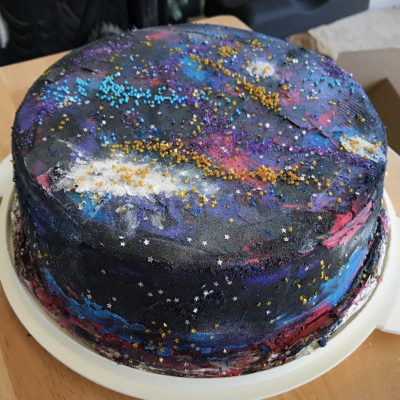

In [16]:
image

In [13]:
resized = image.resize((400,400))

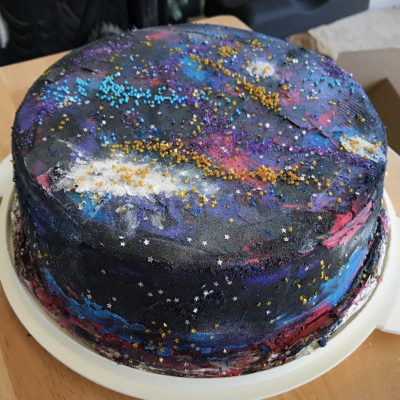

In [14]:
resized

In [36]:
valid_image_2 = ImageDataGenerator().flow(resized, batch_size=1)

ValueError: ('Input data in `NumpyArrayIterator` should have rank 4. You passed an array with shape', (400, 400, 4))

In [17]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image - setting ratio at 1.1 per mean ratios of my images:
    resized = cv2.resize(image, (400,400), interpolation = inter)

    # return the resized image
    return resized

In [34]:
# Create resized images and save to new folders:
img = cv2.imread('images/validation_cakes/cake04.jpg', -1)
img_new = image_resize(img, width=400, height=400)
cv2.imwrite('images/validation_cakes/cake04_resized.jpg', img_new)

True

In [33]:
type(img)

numpy.ndarray

#### Conclusion and Status
I now have just over 800 identically sized cake images to use for training and testing sets in my model. I will randomly split these 75% for training, 25% for testing and then begin building my Convolutional Neural Network.